# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for index, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}") 

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}) 

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | meldorf
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | galesong
Processing Record 9 of Set 1 | kabompo
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | flin flon
Processing Record 12 of Set 1 | holualoa
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | khanbari
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | papao
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | upington
Processing Record 20 of Set 1 | qaqortoq
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | unic

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,64.53,86,85,9.31,ZA,1704586479
1,new norfolk,-42.7826,147.0587,73.92,50,98,2.98,AU,1704586479
2,port-aux-francais,-49.3500,70.2167,41.38,79,98,25.57,TF,1704586483
3,meldorf,54.0918,9.0687,33.85,91,100,10.98,DE,1704586483
4,lihue,21.9789,-159.3672,83.44,72,0,5.75,US,1704586222


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\carli\\OneDrive\\Desktop\\Data-Analyst\\Projects\\python-api-challenge\\city_data", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\carli\\OneDrive\\Desktop\\Data-Analyst\\Projects\\python-api-challenge\\city_data", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,64.53,86,85,9.31,ZA,1704586479
1,new norfolk,-42.7826,147.0587,73.92,50,98,2.98,AU,1704586479
2,port-aux-francais,-49.3500,70.2167,41.38,79,98,25.57,TF,1704586483
3,meldorf,54.0918,9.0687,33.85,91,100,10.98,DE,1704586483
4,lihue,21.9789,-159.3672,83.44,72,0,5.75,US,1704586222


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

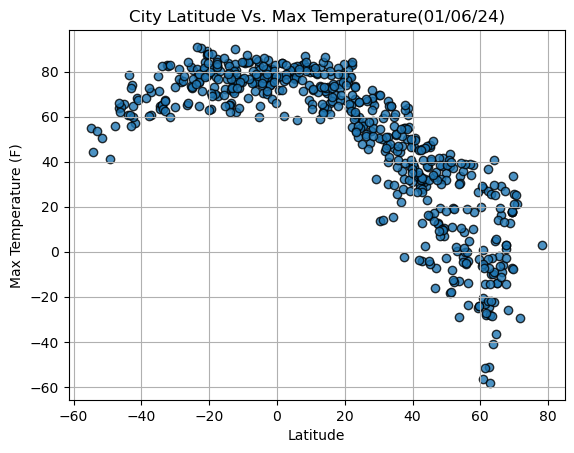

In [8]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\carli\\OneDrive\\Desktop\\Data-Analyst\\Projects\\python-api-challenge\\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

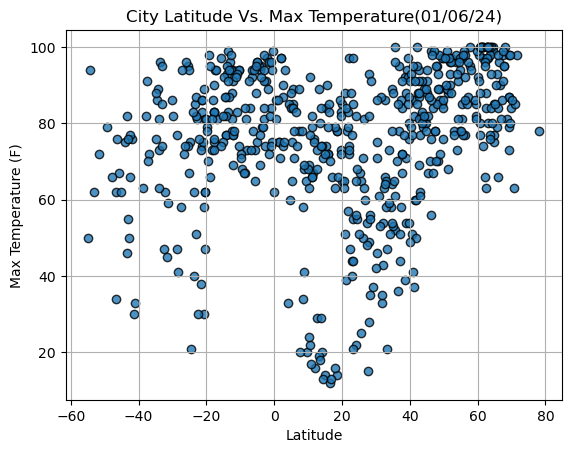

In [9]:
# Build the scatter plots for latitude vs. humidity
lats = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\carli\\OneDrive\\Desktop\\Data-Analyst\\Projects\\python-api-challenge\\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

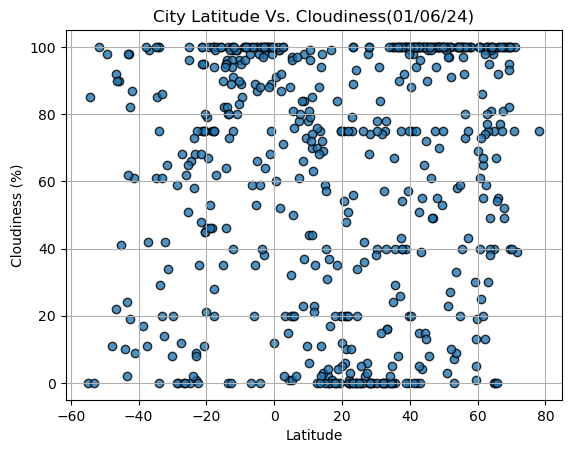

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lats = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\carli\\OneDrive\\Desktop\\Data-Analyst\\Projects\\python-api-challenge\\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

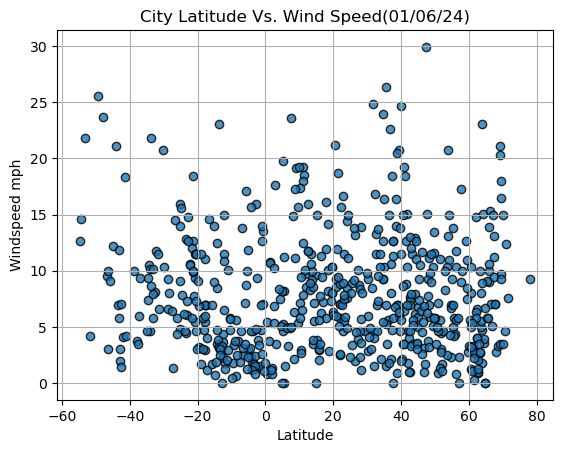

In [11]:
# Build the scatter plots for latitude vs. wind speed
lats = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:\\Users\\carli\\OneDrive\\Desktop\\Data-Analyst\\Projects\\python-api-challenge\\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,meldorf,54.0918,9.0687,33.85,91,100,10.98,DE,1704586483
4,lihue,21.9789,-159.3672,83.44,72,0,5.75,US,1704586222
5,isafjordur,66.0755,-23.1240,28.99,66,55,8.97,IS,1704586484
8,kapuskasing,49.4169,-82.4331,6.89,85,100,10.36,CA,1704586484
9,flin flon,54.7682,-101.8650,-2.36,78,100,6.91,CA,1704586484


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,64.53,86,85,9.31,ZA,1704586479
1,new norfolk,-42.7826,147.0587,73.92,50,98,2.98,AU,1704586479
2,port-aux-francais,-49.3500,70.2167,41.38,79,98,25.57,TF,1704586483
6,galesong,-5.3166,119.3661,82.42,88,100,9.95,ID,1704586484
7,kabompo,-13.5927,24.2008,66.24,99,100,3.40,ZM,1704586484


###  Temperature vs. Latitude Linear Regression Plot

In [18]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Temperature")
    print(f"The r-squared is: {rvalue}")

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

NameError: name 'x_values' is not defined

The r-squared is: 0.5385480924405538


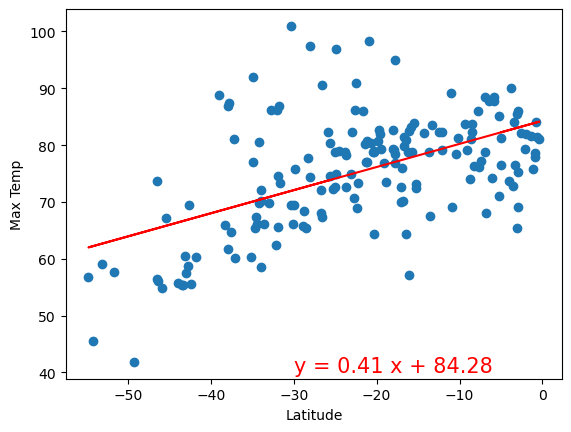

In [ ]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    print(f"The r-squared is: {rvalue}")
    
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** This linear regression shows a moderate positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4539420160557106


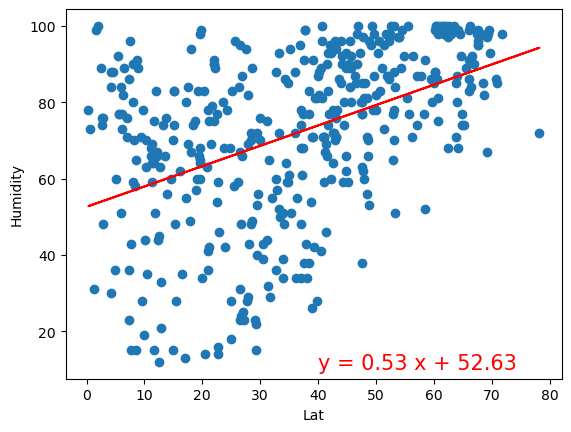

In [ ]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel("Humidity")
    print(f"The r-squared is: {rvalue}")
    
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.5385480924405538


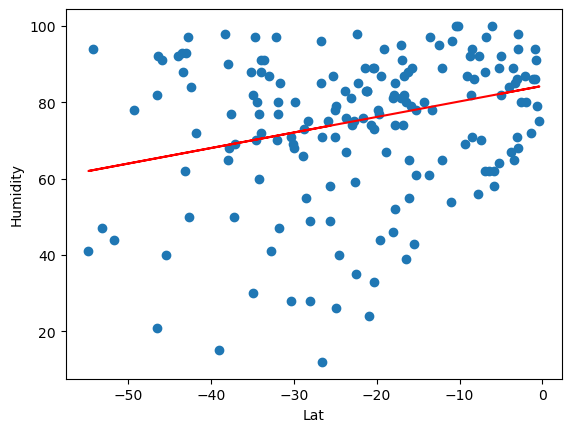

In [ ]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel("Humidity")
    print(f"The r-squared is: {rvalue}")

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** The linear regression shows a weak positive correlation. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.16245570951195717


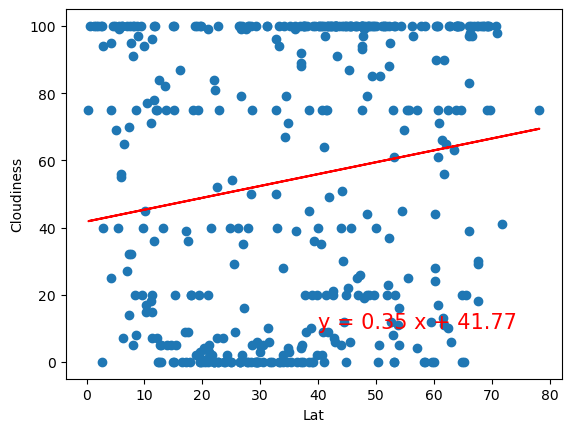

In [ ]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel("Cloudiness")
    print(f"The r-squared is: {rvalue}")

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.16175094355645114


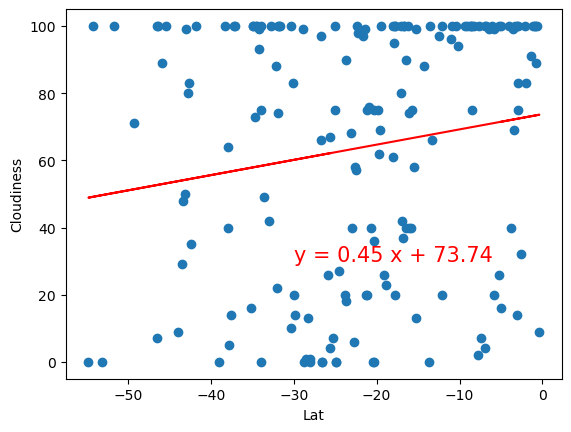

In [ ]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel("Cloudiness")
    print(f"The r-squared is: {rvalue}")

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** The linear regression is a very weak positive correlation, although it almost has no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.05110144085938884


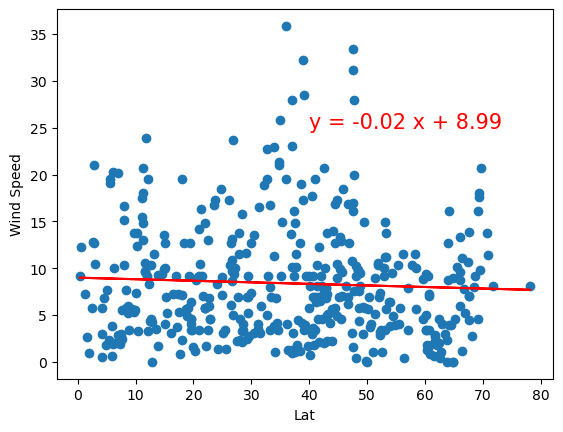

In [ ]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel("Wind Speed")
    print(f"The r-squared is: {rvalue}")

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

In [ ]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel("Wind Speed")
    print(f"The r-squared is: {rvalue}")

x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 172 and the array at index 1 has size 417

**Discussion about the linear relationship:** YOUR RESPONSE HERE